# 1.0 Imports

In [629]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn import datasets

## 1.1 Building Regression  Dataset

In [630]:
learning_rate = 0.1

x, y = datasets.make_regression(n_samples=5, 
                                n_features=1,
                                n_informative=10,
                                n_targets=1,
                                bias=0.0,
                                effective_rank=None, 
                                tail_strength=0.5,
                                noise=0.0, 
                                shuffle=True,
                                coef=False,
                                random_state=None)

# dimension of the input variables
dim_x = x.shape[1]

In [631]:
print(x)

[[ 1.31161729]
 [-0.83984269]
 [-0.61554255]
 [-1.12012185]
 [-0.67744944]]


In [632]:
print(y)

[ 72.28356813 -46.28394801 -33.9227093  -61.73020526 -37.33441401]


## 1.2 Plotting the data

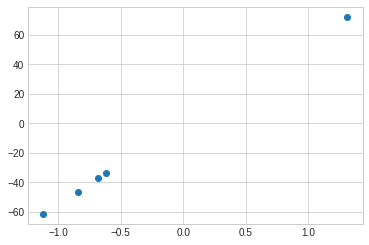

In [633]:
try:
    plt.scatter(x, y);
except ValueError:
    print("Data is not 2 dimensional");

## 1.3 Shape of Input and Output Variables

In [634]:
# total number of points, features
print(x.shape)

(5, 1)


In [635]:
# target variables
print(y.shape)

(5,)


## 2.  Initializing the weights

In [636]:
# initializing the weights and biases
w = np.random.normal(loc = 0.2, scale = 2, size = (dim_x))
b = np.random.normal(loc = 0.2, scale = 2, size = (1))

print("w:", w)
print("b:", b)

w: [-1.6229819]
b: [0.61047117]


## 2.2 Calculation of MSE Loss

In [637]:
def MSE(weights = w, bias = b, x_vals = x, y_vals = y):
    y_pred = np.add(np.dot(x_vals, weights), bias)     
    squared_error = np.sum((y_pred - y)**2)
    mean_squared_error = (1/samples) * squared_error
    return round(mean_squared_error, 2)

In [638]:
# MSE for random weights initialisation
MSE(weights = w, bias = b, x_vals = x, y_vals = y)

146.79

##  2.3 Getting Gradients 

In [639]:
def get_gradients(weights = w, bias = b, data = x):
    w_grads = [2/samples * np.sum((y - np.add(np.dot(data, weights), bias))*(-data[:,i])) for i in range(0, dim_x)]
    w_grad = np.array(w_grads)
    b_grad = 2/samples * np.sum((np.add(np.dot(data, weights), bias) - y))
    b_grad = np.array(b_grad)     
    return w_grad, b_grad

## 3. Performing gradient Descent

In [640]:
def gradient_descent(steps = steps, weights = w, bias = b, learning_rate = learning_rate):
    MSE_lst = []
    for i in range(0, steps+1):
        w_grad,b_grad = get_gradients(weights = weights, bias = bias, data = x)
        # updating the weights
        weights -= learning_rate * w_grad
        bias -= learning_rate * b_grad
        loss = MSE(weights = w, bias = b, x_vals = x, y_vals = y)
        MSE_lst.append(loss)

        if i % 40 == 0:
            print(f"STEP {i}, LOSS: {round(loss, 2)}")
    return w, b, MSE_lst

In [641]:
w, b, MSE_iter = gradient_descent(steps = 5000)

STEP 0, LOSS: 143.64
STEP 40, LOSS: 63.38
STEP 80, LOSS: 30.85
STEP 120, LOSS: 16.43
STEP 160, LOSS: 9.38
STEP 200, LOSS: 5.61
STEP 240, LOSS: 3.45
STEP 280, LOSS: 2.16
STEP 320, LOSS: 1.36
STEP 360, LOSS: 0.86
STEP 400, LOSS: 0.55
STEP 440, LOSS: 0.35
STEP 480, LOSS: 0.22
STEP 520, LOSS: 0.14
STEP 560, LOSS: 0.09
STEP 600, LOSS: 0.06
STEP 640, LOSS: 0.04
STEP 680, LOSS: 0.02
STEP 720, LOSS: 0.01
STEP 760, LOSS: 0.01
STEP 800, LOSS: 0.01
STEP 840, LOSS: 0.0
STEP 880, LOSS: 0.0
STEP 920, LOSS: 0.0
STEP 960, LOSS: 0.0
STEP 1000, LOSS: 0.0
STEP 1040, LOSS: 0.0
STEP 1080, LOSS: 0.0
STEP 1120, LOSS: 0.0
STEP 1160, LOSS: 0.0
STEP 1200, LOSS: 0.0
STEP 1240, LOSS: 0.0
STEP 1280, LOSS: 0.0
STEP 1320, LOSS: 0.0
STEP 1360, LOSS: 0.0
STEP 1400, LOSS: 0.0
STEP 1440, LOSS: 0.0
STEP 1480, LOSS: 0.0
STEP 1520, LOSS: 0.0
STEP 1560, LOSS: 0.0
STEP 1600, LOSS: 0.0
STEP 1640, LOSS: 0.0
STEP 1680, LOSS: 0.0
STEP 1720, LOSS: 0.0
STEP 1760, LOSS: 0.0
STEP 1800, LOSS: 0.0
STEP 1840, LOSS: 0.0
STEP 1880, LOSS:

## 3.1 Plotting the best fit line

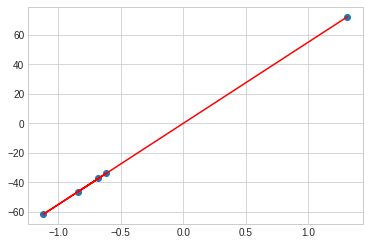

In [642]:
try:
    plt.scatter(x, y);
    plt.plot(x, np.dot(x, w) + b, color = "r");
except ValueError:
    print("Data is not two dimensional!")

## 3.2 Loss values over Iteration

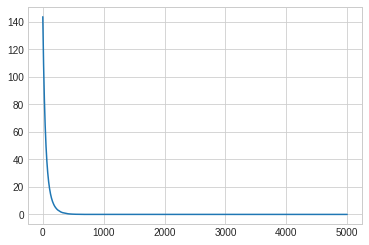

In [643]:
plt.plot(MSE_iter);

## 4. Making Prediction

In [644]:
def predict(data = x, weight = w, bias = b):
    return round(np.add(np.dot(data, weight), bias)[0], 3)